In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("placement.csv")

In [7]:
df.sample(10)

,cgpa,placement_exam_marks,placed
114,6.30,77.0,1
489,7.24,50.0,0
140,6.85,22.0,1
20,6.69,47.0,0
576,6.12,8.0,1
811,8.04,14.0,0
868,7.33,36.0,0
116,7.16,21.0,0
89,6.56,17.0,0
567,6.18,36.0,1


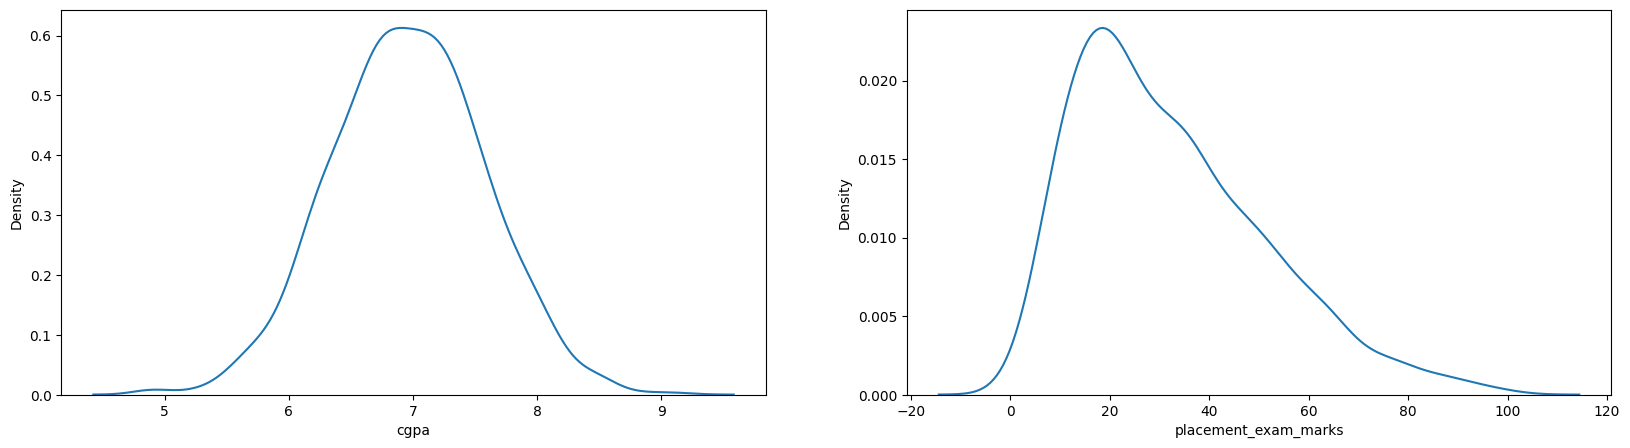

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(df["cgpa"])

plt.subplot(1,2,2)
sns.kdeplot(df["placement_exam_marks"])
plt.show()


In [11]:
# we can clearly see that there is a normal distribution in CGAPA
# but there is also right skewness in Placement Exam Marks

In [13]:
df["placement_exam_marks"].skew()

np.float64(0.8356419499466834)

In [14]:
df["cgpa"].skew()

np.float64(-0.014529938929314918)

In [19]:
# OUTLIER DETECTION AND REMOVAL
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [21]:
print(" Boundary lines")
print("Highest allowed" , df["cgpa"].mean() + 3*df["cgpa"].std())  
print("Least allowed" , df["cgpa"].mean() - 3*df["cgpa"].std())     

 Boundary lines
Highest allowed 8.808933625397168
Least allowed 5.113546374602832


In [25]:
# Outliers 
df_nonOutliers  = df[(df["cgpa"].mean() + 3*df["cgpa"].std() > df["cgpa"]) & (df["cgpa"].mean() - 3*df["cgpa"].std() < df["cgpa"])]

In [30]:
df_outliers = df.drop(df_nonOutliers.index)
df_outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [37]:
df_outliers.count() , df_outliers.shape

(cgpa                    5
 placement_exam_marks    5
 placed                  5
 dtype: int64,
 (5, 3))

In [39]:
# Now to remove OUTLIERS : 1. TRIMMING
#                          2. CAPPING